In [ ]:
import numpy as np
print(np.__version__)

1.23.1


In [ ]:
#Warnings 제거
import warnings
warnings.filterwarnings('ignore')

#문제상황

의류회사에서 생산량 조절을 위한 판매량을 예측하려함

의류의 종류에 따라 계절성을 많이 타기 때문에, 이러한 특성을 고려할 수 있는 모델링 필요

#데이터 살펴보기

In [ ]:
%pip install mxnet gluonts

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

In [ ]:
df = pd.read_excel('/content/WEAR_TS_ALL.xlsx')
df.head()

,SEASON,TYPE,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-16 00:00:00,2016-01-17 00:00:00,2016-01-18 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-23 00:00:00,2016-01-24 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2016-01-27 00:00:00,2016-01-28 00:00:00,2016-01-29 00:00:00,2016-01-30 00:00:00,2016-01-31 00:00:00,2016-02-01 00:00:00,2016-02-02 00:00:00,2016-02-03 00:00:00,2016-02-04 00:00:00,2016-02-05 00:00:00,2016-02-06 00:00:00,2016-02-07 00:00:00,2016-02-08 00:00:00,2016-02-09 00:00:00,2016-02-10 00:00:00,2016-02-11 00:00:00,2016-02-12 00:00:00,2016-02-13 00:00:00,2016-02-14 00:00:00,2016-02-15 00:00:00,2016-02-16 00:00:00,2016-02-17 00:00:00,...,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,4.0,1.0,3.0,5.0,6.0,2.0,9.0,2.0,7.0,4.0,5.0,3.0,19.0,18.0,13.0,3.0,6.0,16.0,19.0,14.0,23.0,3.0,2.0,11.0,13.0,13.0,10.0,18.0,30.0,10.0,13.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,6.0,2.0,12.0,14.0,1.0,7.0,3.0,8.0,5.0,11.0,1.0,NaN,11.0,9.0,4.0,5.0,10.0,4.0,5.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,7.0,6.0,8.0,4.0,9.0,5.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,1.0,2.0,1.0,3.0,4.0,9.0,2.0,NaN,4.0,6.0,3.0,1.0,8.0,1.0,4.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.shape

(515, 1463)

#문제해결 프로세스 정의

##문제정의

회사에서 재고에 대한 걱정 늘어남

판매량을 예측 할 수 있다면 재고 비용을 비약적으로 줄일 수 있을 것으로 기대

##기대효과

의류 시장에서의 큰 비용 중 하나는 재고 비용

적정 생산량 예측을 통한 재고 비용 감소

##해결 방안

시계열 예측을 통한 판매량 예측, RandomForest를 활용한 판매량 예측

Session 1

- Data Preprocessing

- Data Visualization

Session 2

- 시계열 예측 모델링

Session 3

- RandomForest Regression을 통한 모델링

##성과측정

실제 판매량과 예측량의 차이

##현업적용

시계열 특성을 가진 데이터를 만났을 때, 접근 할 수 있는 방법 체득

#Session 1 - Data 전처리 및 Data EDA

##수집된 데이터의 기본 정보 확인

1. Data Shape

2. Data type

3. Null

In [ ]:
!pip uninstall numpy

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.25.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.25.2


In [ ]:
!pip install numpy==1.23.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 31.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.1 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.1 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.1 which is incompatible.


In [ ]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import mxnet as mx
import pandas as pd
from matplotlib import rc
from matplotlib.dates import date2num

# rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

mx.random.seed(0)
np.random.seed(0)

In [ ]:
df = pd.read_excel('/content/WEAR_TS_ALL.xlsx')
df

,SEASON,TYPE,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-16 00:00:00,2016-01-17 00:00:00,2016-01-18 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-23 00:00:00,2016-01-24 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2016-01-27 00:00:00,2016-01-28 00:00:00,2016-01-29 00:00:00,2016-01-30 00:00:00,2016-01-31 00:00:00,2016-02-01 00:00:00,2016-02-02 00:00:00,2016-02-03 00:00:00,2016-02-04 00:00:00,2016-02-05 00:00:00,2016-02-06 00:00:00,2016-02-07 00:00:00,2016-02-08 00:00:00,2016-02-09 00:00:00,2016-02-10 00:00:00,2016-02-11 00:00:00,2016-02-12 00:00:00,2016-02-13 00:00:00,2016-02-14 00:00:00,2016-02-15 00:00:00,2016-02-16 00:00:00,2016-02-17 00:00:00,...,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,4.0,1.0,3.0,5.0,6.0,2.0,9.0,2.0,7.0,4.0,5.0,3.0,19.0,18.0,13.0,3.0,6.0,16.0,19.0,14.0,23.0,3.0,2.0,11.0,13.0,13.0,10.0,18.0,30.0,10.0,13.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,6.0,2.0,12.0,14.0,1.0,7.0,3.0,8.0,5.0,11.0,1.0,NaN,11.0,9.0,4.0,5.0,10.0,4.0,5.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,7.0,6.0,8.0,4.0,9.0,5.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,1.0,2.0,1.0,3.0,4.0,9.0,2.0,NaN,4.0,6.0,3.0,1.0,8.0,1.0,4.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.shape

(515, 1463)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Columns: 1463 entries, SEASON to 2019-12-31 00:00:00
dtypes: float64(1461), object(2)
memory usage: 5.7+ MB


In [ ]:
df.dtypes

SEASON                  object
TYPE                    object
2016-01-01 00:00:00    float64
2016-01-02 00:00:00    float64
2016-01-03 00:00:00    float64
                        ...   
2019-12-27 00:00:00    float64
2019-12-28 00:00:00    float64
2019-12-29 00:00:00    float64
2019-12-30 00:00:00    float64
2019-12-31 00:00:00    float64
Length: 1463, dtype: object

In [ ]:
#국내와 해외는 특성 차이로 인해 동시에 모델링 불가, 국내 데이터만 필터링
df = df[df['TYPE'] == '국내']
#시즌별 판매량 예측이 목적이므로 SEASON으로 묶어서 합계를 생성
df = df.drop('TYPE', axis = 1).groupby('SEASON').sum()
#날짜별 판매량을 행으로 다루기 위해 Transpose
df = df.T
#현재 index는 날짜형 index가 아니므로 날짜형 index로 변경
df.index = pd.to_datetime(df.index)

df.head()

SEASON,16SS,17SS,18SS,19SS,20SS
2016-01-01,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0,0.0
2016-01-05,2.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe()

SEASON,16SS,17SS,18SS,19SS,20SS
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,107.552361,98.299110,126.663929,59.687201,0.002738
std,245.889082,251.650179,564.161672,180.142904,0.073973
min,-913.000000,-1958.000000,-12875.000000,-17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000,0.000000
75%,100.000000,62.000000,101.000000,0.000000,0.000000
max,2223.000000,2752.000000,13293.000000,1686.000000,2.000000


In [ ]:
df.shape

(1461, 5)

In [ ]:
df.index.day

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int32', length=1461)

In [ ]:
df

SEASON,16SS,17SS,18SS,19SS,20SS
2016-01-01,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0,0.0
2016-01-05,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-27,0.0,0.0,1.0,0.0,0.0
2019-12-28,0.0,0.0,3.0,0.0,2.0
2019-12-29,0.0,0.0,0.0,0.0,2.0
2019-12-30,0.0,0.0,0.0,0.0,0.0


In [ ]:
#각 시즌별 상품은 각 시즌에 대부분 판매되기 때문에 판매량이라는 기준으로 통합

df = pd.concat([
    df[df.index.year == 2016]['16SS'],
    df[df.index.year == 2017]['17SS'],
    df[df.index.year == 2018]['18SS'],
    df[df.index.year == 2019]['19SS']
])
df = pd.DataFrame(df, columns = ['sales'])

df

,sales
2016-01-01,0.0
2016-01-02,0.0
2016-01-03,0.0
2016-01-04,0.0
2016-01-05,2.0
...,...
2019-12-27,0.0
2019-12-28,0.0
2019-12-29,0.0
2019-12-30,0.0


<Axes: >

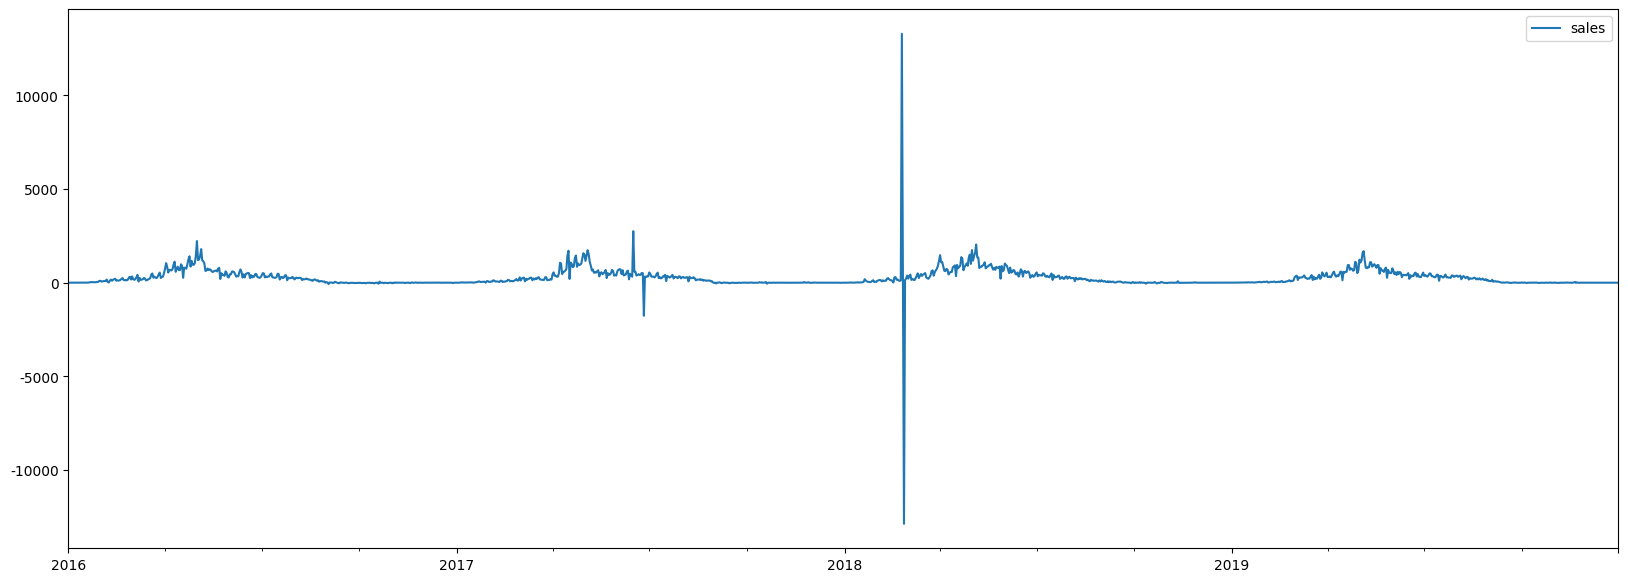

In [ ]:
#음수가 많이 나오는건 말이 안됨
#주문에 장난을 치는것으로 예상
#100개만 주문하고 싶지만 그럼 받아주지않아서 일부로 1만개를 주문한 뒤 다 취소해버림
#데이터만 봐서는 무슨일인지 알기어려움
#도메인 이해의 중요성이 매우 높음
df.plot(figsize = (20, 7))

In [ ]:
#시스템 오류(장난질)로 인해 발생한 Outlier 삭제를 위해 값 치환
df[(df['sales'] < -1000) | (df['sales'] > 2500)] = 0

<Axes: >

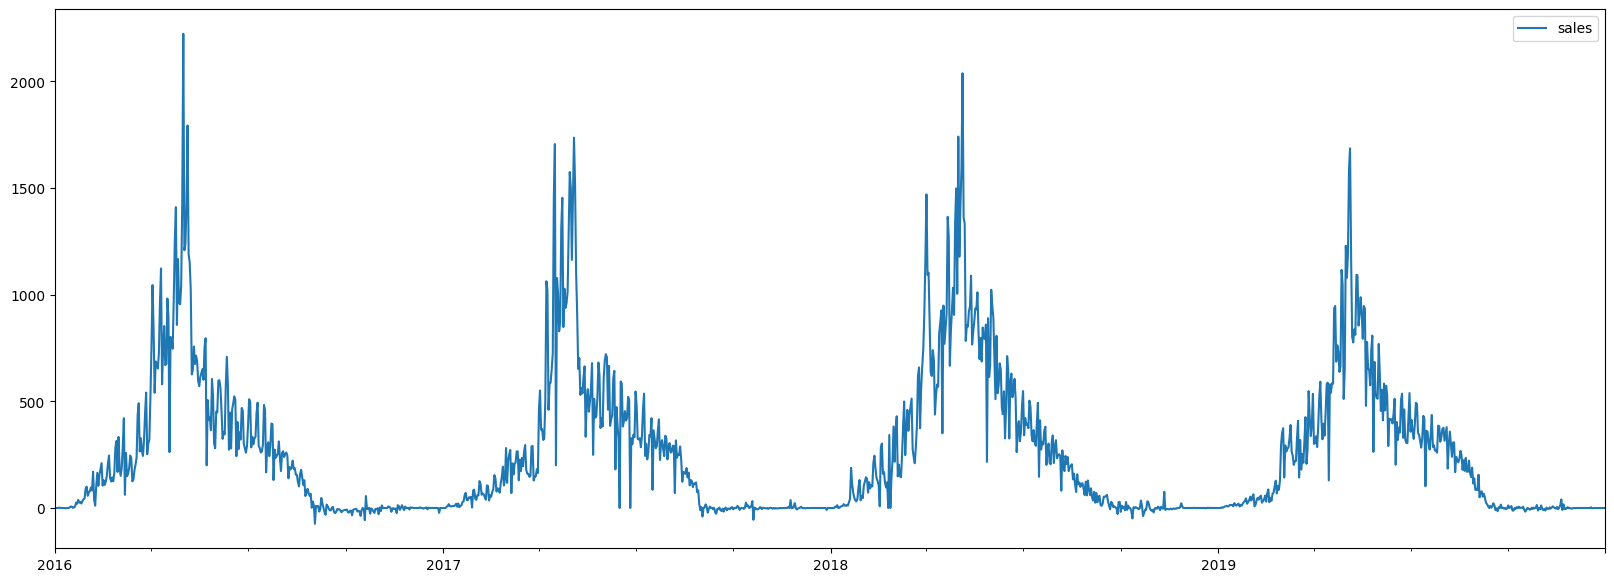

In [ ]:
df.plot(figsize = (20, 7))

In [ ]:
#학습 데이터는 2019년 여름 시즌 이전까지
train_df = df[:-200]
#테스트 데이터는 2019년 여름 시즌부터 겨울 시즌 전까지 peak 100일에 대한 예측
test_df = df[-200:-100]

#Session 2 - DeepAR

##Time series data model using DeepAR

In [ ]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from pathlib import Path
import seaborn as sns

In [ ]:
def plot_prob_forecasts(ts_entry, forecast_entry):
  prediction_intervals = (0.9, 0.5)
  legend = ['Sales', 'observations', 'median prediction'] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

  fix, ax = plt.subplots(1, 1, sharex = True, sharey = False, figsize = (20, 7))

  ts_entry.plot(ax = ax)
  forecast_entry.plot(intervals = prediction_intervals, color = 'g')
  plt.grid(which = 'both')
  plt.legend(legend, loc = 'upper left')
  plt.show()

In [ ]:
train_df.head(1)

,sales
2016-01-01,0.0


In [ ]:
test_df.head(1)

,sales
2019-06-15,442.0


In [ ]:
#DeepAr을 사용하기 위해 미리 만들어둔 DataFrame을 ListDatasetㅇ르ㅗ 다시 생성

train_ds = ListDataset([{FieldName.TARGET : train_df.values.flatten(),
                        FieldName.START : pd.Timestamp('2016-01-01 00:00:00', unit = 'D')}],
                      freq = 'D')

test_ds = ListDataset([{FieldName.TARGET : test_df.values.flatten(),
                        FieldName.START : pd.Timestamp('2019-06-15 00:00:00', unit = 'D')}],
                      freq = 'D')

In [ ]:
train_ds

[{'target': array([  0.,   0.,   0., ..., 414., 416., 396.], dtype=float32),
  'start': Period('2016-01-01', 'D')}]

In [ ]:
#시계열 예측 알고리즘 중 가장 많이 사용되는 알고리즘 중 하나인 DeepAR(AutoRegression) 사용

estimator = DeepAREstimator(
    freq = 'D',
    trainer = Trainer(ctx = 'cpu', epochs = 30, learning_rate = 1E-3, hybridize = True, num_batches_per_epoch = 30),
    #Deeplearning layer 수
    num_layers = 4,
    #lstm 셀 갯수
    num_cells = 40,
    context_length = 30,
    cell_type = 'lstm',#or gru

    #얼마의 기간에 대해 예측할 것인지
    prediction_length = 30
)

predictor = estimator.train(train_ds)

100%|██████████| 30/30 [00:08<00:00,  3.40it/s, epoch=30/30, avg_epoch_loss=4.23]


In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset = test_ds,
    predictor = predictor,
    num_samples = 10
)

forecasts = list(forecast_it)
tss = list(ts_it)

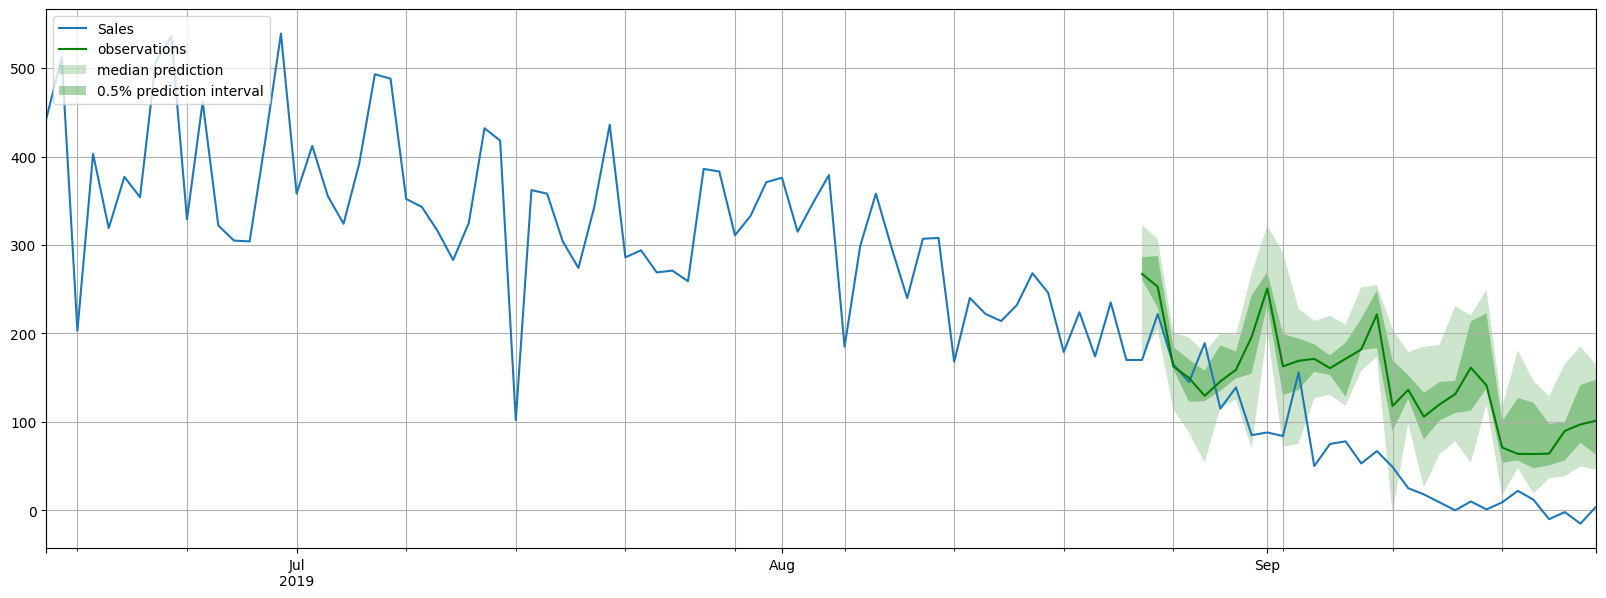

In [ ]:
ts_entry = tss[0]#리스트 안쪽 값만 가져옴
test_ds_entry = next(iter(test_ds))
forecast_entry = forecasts[0]

plot_prob_forecasts(ts_entry, forecast_entry)

##Time series modeling Error result

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
print(mean_squared_error(list(ts_entry[0][-30:]), list(forecast_entry.quantile(0.5)), squared = False))
print(mean_absolute_percentage_error(list(ts_entry[0][-30:]), list(forecast_entry.quantile(0.5))))

95.3842725480231
1.9720565677883396e+16


#Session 3 - RandomForest

##Make a dataset for RandomForestRegressor

In [ ]:
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def get_slope(array):
  y = np.array(array)
  x = np.arange(len(y))
  slope, intercept, r_value, p_value, std_err = linregress(x, y)
  return slope

def evaluate(model, test_features, test_labels):
  predictions = model.predict(test_features)
  errors = abs(predictions - test_labels)
  mape = 100 * np.mean(errors / test_labels)
  return mape

In [ ]:
rdf = df

In [ ]:
rdf.head()

,sales
2016-01-01,0.0
2016-01-02,0.0
2016-01-03,0.0
2016-01-04,0.0
2016-01-05,2.0


In [ ]:
#.rolling(n) : n개씩 묶다
rdf['slope7'] = rdf['sales'].rolling(7).apply(get_slope, raw = True)#7일동안의 판매량 기울기
rdf['slope21'] = rdf['sales'].rolling(21).apply(get_slope, raw = True)#21일동안의 판매량 기울기

rdf['std7'] = rdf['sales'].rolling(7).std()#7일동안의 표준편차
rdf['std21'] = rdf['sales'].rolling(21).std()#21일동안의 표준편차

rdf['mean7'] = rdf['sales'].rolling(7).mean()#7일동안의 평균
rdf['mean21'] = rdf['sales'].rolling(21).mean()#21일동안의 평균

rdf['skew7'] = rdf['sales'].rolling(7).skew()#7일동안의 왜도
rdf['skew21'] = rdf['sales'].rolling(21).skew()#21일동안의 왜도

rdf['kurt7'] = rdf['sales'].rolling(7).kurt()#7일동안의 첨도
rdf['kurt21'] = rdf['sales'].rolling(21).kurt()#21일동안의 첨도

rdf['min7'] = rdf['sales'].rolling(7).min()#7일동안의 최소
rdf['min21'] = rdf['sales'].rolling(21).min()#21일동안의 최소

rdf['max7'] = rdf['sales'].rolling(7).max()#7일동안의 최소
rdf['max21'] = rdf['sales'].rolling(21).max()#21일동안의 최소

In [ ]:
#계산값이 7일, 21일부터 시작하므로 편의상 한달 스킵

rdf = rdf[31: -122]
rdf

,sales,slope7,slope21,std7,std21,mean7,mean21,skew7,skew21,kurt7,kurt21,min7,min21,max7,max21
2016-02-01,57.0,10.428571,3.935065,29.668807,28.585461,55.285714,26.142857,0.707934,1.414898,-0.996791,1.687694,21.0,0.0,100.0,100.0
2016-02-02,73.0,7.428571,4.170130,25.927555,29.665597,62.714286,29.619048,0.432936,1.131092,-1.569140,0.591354,33.0,0.0,100.0,100.0
2016-02-03,79.0,4.928571,4.388312,22.779481,30.712337,69.285714,33.380952,-0.009294,0.890337,-1.599134,-0.201782,41.0,0.0,100.0,100.0
2016-02-04,96.0,3.750000,4.724675,20.796062,32.582934,77.142857,37.952381,-0.605401,0.728907,-0.889447,-0.711343,44.0,1.0,100.0,100.0
2016-02-05,82.0,-0.464286,4.797403,14.797040,32.904624,82.571429,41.714286,-0.671901,0.525719,0.109354,-1.088270,57.0,1.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,145.0,-6.250000,-6.789610,32.690468,56.287316,183.000000,227.809524,0.895658,0.599335,-0.546034,-0.107521,145.0,145.0,235.0,358.0
2019-08-28,189.0,-6.892857,-5.433766,32.493223,48.250290,185.142857,219.761905,0.641046,0.395539,-0.840631,-0.665575,145.0,145.0,235.0,308.0
2019-08-29,115.0,-7.285714,-5.690909,33.446475,49.996905,168.000000,211.095238,0.035360,0.224170,0.890255,-0.180060,115.0,115.0,222.0,308.0
2019-08-30,139.0,-10.107143,-6.214286,35.146632,51.899078,163.571429,206.285714,0.431834,0.350925,0.142680,-0.307589,115.0,115.0,222.0,308.0


In [ ]:
y = rdf['sales']
X = rdf.drop('sales', axis = 1).fillna(0)
X = X[:-30]
y = y[30:]
#X, y를 shift하는 효과줌
#ex) X는 1~70, y = 30~100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.03, random_state = 0, shuffle = False)

MAPE: 63.40072156296858


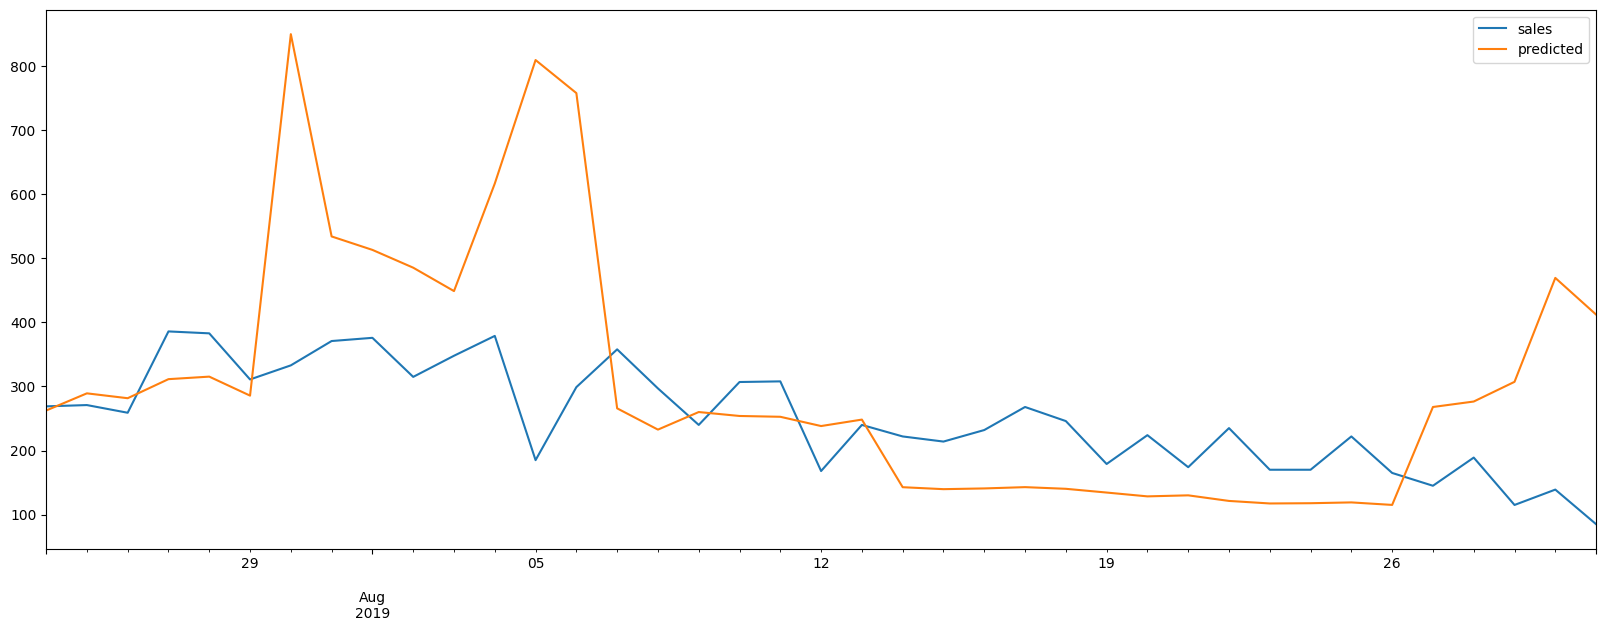

In [ ]:
#Default setting으로 RandomForest 학습
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train, y_train)

mape = evaluate(rf, X_test, y_test)

predicted = rf.predict(X_test)

pdf = pd.DataFrame(y_test)

pdf['predicted'] = predicted

pdf.plot(figsize = (20, 7))

print(f'MAPE: {mape}')

##Tune by hand to decrease underfitting

MAPE: 31.949452461456456


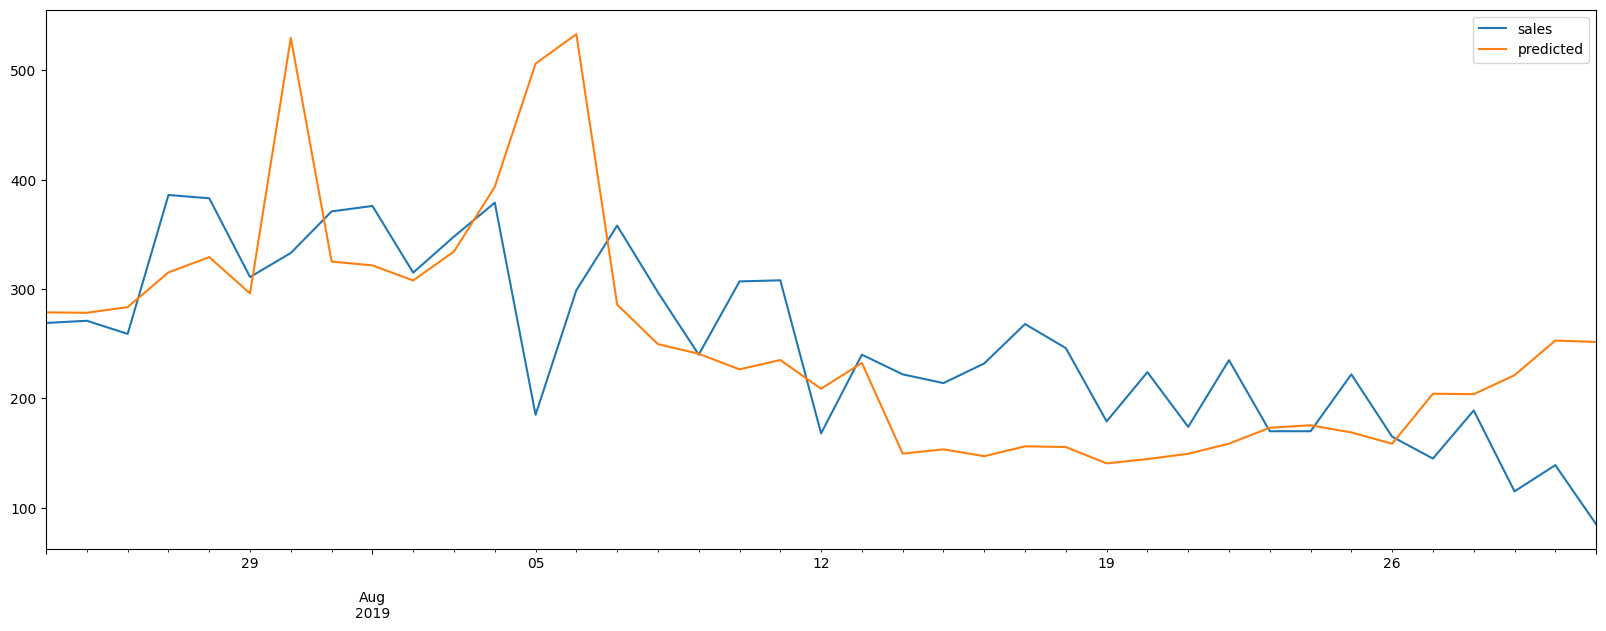

In [ ]:
#Underfitting을 조정하기 위한 n_estimator과 max_features만 조정

rf = RandomForestRegressor(random_state = 0, n_estimators = 200, max_features = 4)
rf.fit(X_train, y_train)

mape = evaluate(rf, X_test, y_test)

predicted = rf.predict(X_test)

pdf = pd.DataFrame(y_test)

pdf['predicted'] = predicted

pdf.plot(figsize = (20, 7))

print(f'MAPE: {mape}')

#Add more feature to consider additional characteristics

In [ ]:
#해마다 늘어나는 판매량 반영
rdf['year'] = rdf.index.year
rdf['month'] = rdf.index.month
rdf['weekofday'] = rdf.index.dayofweek

y = rdf['sales']
X = rdf.drop('sales', axis = 1).fillna(0)
X = X[:-30]
y = y[30:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.03, random_state = 0, shuffle = False)

MAPE: 20.541401180000847


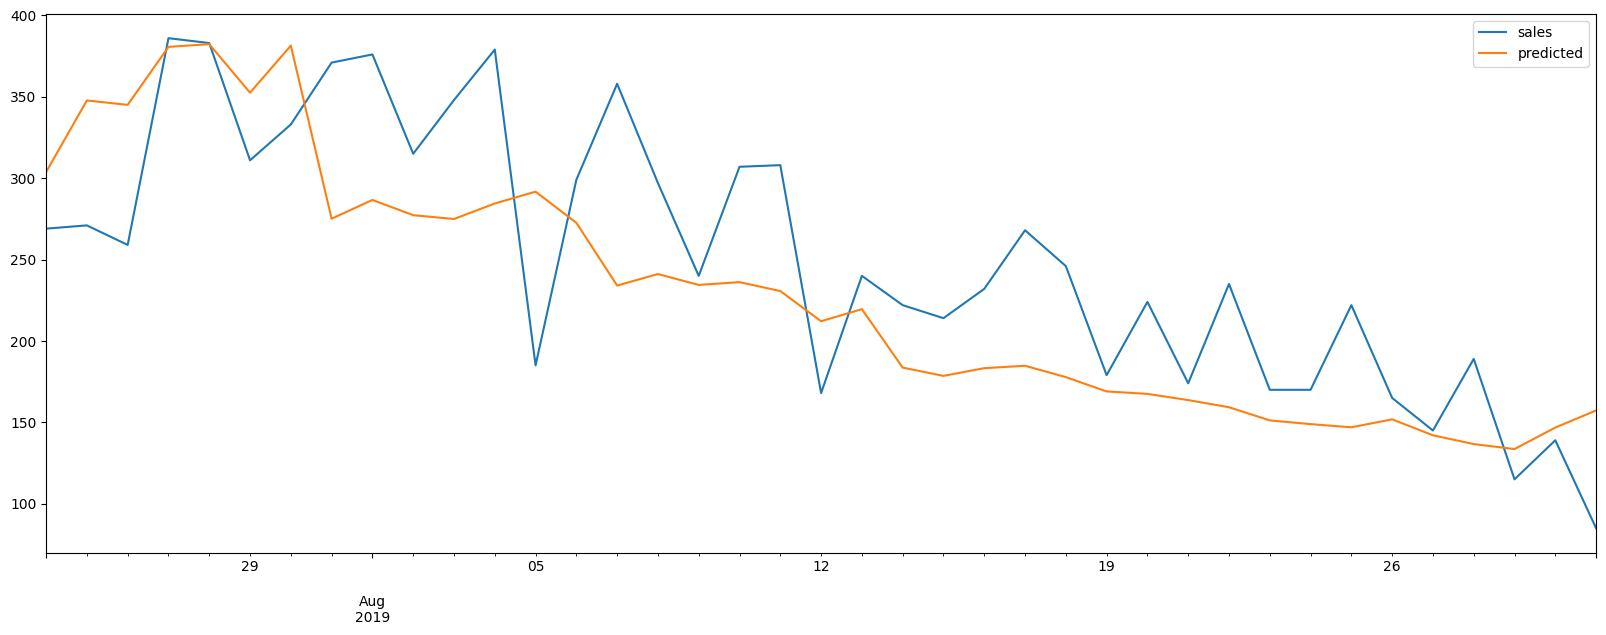

In [ ]:
rf = RandomForestRegressor(random_state = 0, n_estimators = 200, max_features = 4)
rf.fit(X_train, y_train)

mape = evaluate(rf, X_test, y_test)

predicted = rf.predict(X_test)

pdf = pd.DataFrame(y_test)

pdf['predicted'] = predicted

pdf.plot(figsize = (20, 7))

print(f'MAPE: {mape}')